<h1><center>Data Wrangle Project - WeRateDogs Datasets</center></h1>

# Section-1 - Introduction

In this Project, The WeRateDogs dataset I'll be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

### Table of Content:
    Section-1 - Introduction
    Section-2 - Gathering Data
    Section-3 - Assessing Data
        Section-3-1 - Assesing Twitter Archived Enhanced file
        Section-3-2 - Assesing Image Prediction file
        Section-3-3 - Assesing Tweet JSON file
    Section-4 - Cleaning Data
        Section-4-1 - Issue
            Issue-01 - Merge dog stages column into one column
            Issue-02 - Drop retweets and replies
            Issue-03 - Rename columns
            Issue-04 - Rectify source values
            Issue-05 - Clean rating_numerator column
            Issue-06 - Clean rating_denominator column
            Issue-07 - Correct dog names
            Issue-08 - Drop tweet with no image
            Issue-09 - Convert timestamp column type
            Issue-10 - Each image has three predictions
            Issue-11 - Rename Columns titles
            Issue-11 - Correct uncorrect prediction
        Section-4-2 - Check Prediction Algorithm Accurecy
    Section-5 - Storing
    Section-6 - Insights and Conclusion

# Section-2 - Gathering Data

In [1]:
# import required libraries to read data (Pandas Library), plot data (Matplotlib library), 
# download file programmaticly (Requests Library).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests as rq
import tweepy as tw
from IPython import display

### Read twitter archive enhanced csv file

In [2]:
# The file 'twitter-archive-enhanced' comes in csv format which can be open using read_csv function in Pandas library
df_csv = pd.read_csv('twitter-archive-enhanced.csv')

### Read image predictions tsv file

In [3]:
# The file 'image_predictions.tsv' comes in tsv format. This file is hosted in Udacity's servers and should be 
# downloaded programaticlly. Requests Library will be used to download the file. After That, read_csv function 
# in Pandas library will be used to read it.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file = rq.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(file.content);
df_tsv = pd.read_csv('image_predictions.tsv', sep='\t')

### Read tweet-json txt file

In [4]:
# Downloading tweet-json data using Twitter API
# The request to obtain credential to download data was rejected
'''
consumer_key = 'consumer key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

authentication = tweepy.OAuthHandler(consumer_key, consumer_secret)
authentication.set_access_token(access_token, access_secret)

api = tweepy.API(authentication, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = twitter_archive.tweet_id.values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
'''

"\nconsumer_key = 'consumer key'\nconsumer_secret = 'consumer_secret'\naccess_token = 'access_token'\naccess_secret = 'access_secret'\n\nauthentication = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauthentication.set_access_token(access_token, access_secret)\n\napi = tweepy.API(authentication, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)\n\ntweet_ids = twitter_archive.tweet_id.values\n\nwith open('tweet_json.txt', 'w') as output:\n    for tweet_id in tweet_ids:\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode='extended')\n            json.dump(tweet._json, output)\n"

In [5]:
# The file 'tweet-json' comes in txt format which can be open using read_json function in Pandas library
df_txt = pd.read_json('tweet-json.txt',lines=True)

# Section-3 - Assessing Data

### Section-3-1 - Assesing Twitter Archived Enhanced file

In [6]:
df_csv.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


observations:
- There are 4 columns for dogs stages.
- There are retweets and replys in the dataset.
- Some Column titles aren't clear.
- Some columns content either confusing or has mutli values

In [7]:
df_csv['in_reply_to_status_id'].isnull().sum()

2278

In [8]:
df_csv.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

We can see the timestamp column has object type which should be converted to Datatime

In [9]:
df_csv.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_csv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_csv.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df_csv.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Buddy         7
Toby          7
Bailey        7
Daisy         7
Leo           6
Koda          6
Jax           6
Scout         6
Dave          6
Stanley       6
Milo          6
Oscar         6
Rusty         6
Jack          6
Bella         6
Finn          5
           ... 
space         1
Rooney        1
Staniel       1
Chadrick      1
Beckham       1
Tebow         1
Laika         1
Shooter       1
Freddery      1
Bobbay        1
Bauer         1
Lulu          1
Bertson       1
Edmund        1
Dante         1
Willow        1
Mac           1
Jessifer      1
Skye          1
Stormy        1
Grizz         1
Kuyu          1
Tassy         1
Monkey        1
Taco          1
Kellogg       1
Dwight        1
Robin         1
Mary          1
Harry         1
Name: name, Length: 957,

Some dogs has uncorrect names such as: 'a', 'an' and 'the'.

In [13]:
print('Number of doggo:', df_csv['doggo'][df_csv['doggo'] != 'None'].count())
print('Number of floofer:', df_csv['floofer'][df_csv['floofer'] != 'None'].count())
print('Number of pupper:', df_csv['pupper'][df_csv['pupper'] != 'None'].count())
print('Number of puppo:', df_csv['puppo'][df_csv['puppo'] != 'None'].count())

Number of doggo: 97
Number of floofer: 10
Number of pupper: 257
Number of puppo: 30


In [14]:
df_csv.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are 28 rating numerator bigger than 14 which represent 1.18% from all tweets

I'll check some tweets with rating_numerator less than 8 to verify the quality of the data

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Unique dog here. Wrinkly as hell. Weird segmented neck. Finger on fire. Doesn&#39;t seem to notice. 5/10 might still pet <a href="https://t.co/Hy9La4xNX3">pic.twitter.com/Hy9La4xNX3</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/682003177596559360?ref_src=twsrc%5Etfw">December 30, 2015</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Jerry. He&#39;s doing a distinguished tongue slip. Slightly patronizing tbh. You think you&#39;re better than us, Jerry? 6/10 hold me back <a href="https://t.co/DkOBbwulw1">pic.twitter.com/DkOBbwulw1</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/848212111729840128?ref_src=twsrc%5Etfw">April 1, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Murphy. He&#39;s a mini golden retriever. Missing two legs (tragic). Mouth sharp. Looks rather perturbed. 6/10 <a href="https://t.co/ALO02IAKCn">pic.twitter.com/ALO02IAKCn</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/700462010979500032?ref_src=twsrc%5Etfw">February 18, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Chuck. He&#39;s a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 <a href="https://t.co/YqbU9xHV3p">pic.twitter.com/YqbU9xHV3p</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/681302363064414209?ref_src=twsrc%5Etfw">December 28, 2015</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Patrick. He&#39;s a bigass pupper. 7/10 <a href="https://t.co/J9DXBFoAQe">pic.twitter.com/J9DXBFoAQe</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/682406705142087680?ref_src=twsrc%5Etfw">December 31, 2015</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


from previous tweets we can canclude that any tweet with rating_numerator less than 8 can be dropped.

In [15]:
df_csv.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

There are 13 rating denominator not equal to 10 which represent 0.55% of all tweets

In [16]:
df_csv.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Observed Issues:
* Issue-1 : There are 4 columns for dogs stages. Thus, will be merged into one column and will be named 'dog_stage'.
* Issue-2 : There are retweets and replies in the dataset which means it might leads to duplicated tweet. Thus, they will be dropped along with related columns.
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id    
    - retweeted_status_user_id      
    - retweeted_status_timestamp    
* Issue-3 : Some Column titles aren't clear and will be renamed as follow:-
    - 'timestamp' to 'tweet_time'
    - 'name' to 'dog_name'
* Issue-4 : source column contents will be rectified to represent the source without any link
* Issue-5 : any tweet with rating_numerator more than 14 will be dropped. Also, any tweet with rating_numerator less than 8.
* Issue-6 : any tweet with rating_denominator not equal to 10 will be dropped.
* Issue-7 : Dogs with correct names like 'a', 'an' and 'the' will be renamed to 'None' since the exist names doesn't represent their real names.
* Issue-8 : any tweets without image will be dropped
* Issue-9 : change tweet_time column type from object to Datatime

### Section-3-2 - Assesing Image Prediction file

In [18]:
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_tsv.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

This table has three predictions for each image. Also, columns title could be improved.

In [20]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_tsv.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


There a 100% prediction for one or more image(s) in the p1_conf. I'll lookup for it to check the quality of the prediction

In [22]:
df_tsv[df_tsv['p1_conf'] == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Shaggy. He knows exactly how to solve the puzzle but can&#39;t talk. All he wants to do is help. 10/10 great guy <a href="https://t.co/SBmWbfAg6X">pic.twitter.com/SBmWbfAg6X</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/667866724293877760?ref_src=twsrc%5Etfw">November 21, 2015</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>



The prediction predicts its 100% sure that this image isn't for a dog. But we can see clearly that this image is for a dog.

In [23]:
df_tsv.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### Observed Issues:
* Issue-10 : Each image has three Predictions.
* Issue-11 : Rename column title
* Issue-12 : Correct uncorrect prediction

### Section-3-3 - Assesing Tweet JSON file

In [24]:
df_txt.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [25]:
df_txt.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

In [26]:
df_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [27]:
df_txt.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


# Section-4 - Cleaning Data

In [28]:
# create copy of the dataset
df_csv_cleaned = df_csv
df_tsv_cleaned = df_tsv

### Section-4-1 - Issue

#### Issue-1:
Merging dog's stage into one column and I'll name it Dog_stage. After that, I'll drop the four columns.

In [29]:
# create column for dog stages 
df_csv_cleaned['dog_stage'] = '-'

In [30]:
df_csv_cleaned.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,-
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,-
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,-
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,-
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,-


In [31]:
 for i in range(len(df_csv_cleaned.index)):
    if df_csv_cleaned.loc[i, 'doggo'] == 'doggo':
        df_csv_cleaned.loc[i, 'dog_stage'] = 'doggo'
    elif df_csv_cleaned.loc[i, 'floofer'] == 'floofer':
        df_csv_cleaned.loc[i, 'dog_stage'] = 'floofer'
    elif df_csv_cleaned.loc[i, 'pupper'] == 'pupper':
        df_csv_cleaned.loc[i, 'dog_stage'] = 'pupper'
    elif df_csv_cleaned.loc[i, 'puppo'] == 'puppo':
        df_csv_cleaned.loc[i, 'dog_stage'] = 'puppo'
    else:
        df_csv_cleaned.loc[i, 'dog_stage'] = 'None' 


In [32]:
df_csv_cleaned[:20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


Now, 'doggo', 'floofer', 'pupper' and 'puppo' columns data merged into dog_stage column. Next step to check if any row has more than one dog stage

In [33]:
 for i in range(len(df_csv_cleaned.index)):
    if df_csv_cleaned.loc[i, 'doggo'] == 'doggo':
        if df_csv_cleaned.loc[i, 'floofer'] == 'floofer':
            print(df_csv_cleaned.iloc[i])
        elif df_csv_cleaned.loc[i, 'pupper'] == 'pupper':
            print(df_csv_cleaned.iloc[i])
        elif df_csv_cleaned.loc[i, 'puppo'] == 'puppo':
            print(df_csv_cleaned.iloc[i])
    elif df_csv_cleaned.loc[i, 'floofer'] == 'floofer':
        if df_csv_cleaned.loc[i, 'pupper'] == 'pupper':
            print(df_csv_cleaned.iloc[i])
        elif df_csv_cleaned.loc[i, 'puppo'] == 'puppo':
            print(df_csv_cleaned.iloc[i])
    elif df_csv_cleaned.loc[i, 'pupper'] == 'pupper':
        if df_csv_cleaned.loc[i, 'puppo'] == 'puppo':
            print(df_csv_cleaned.iloc[i]) 


tweet_id                                                     855851453814013952
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-04-22 18:31:02 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a puppo participating in the #ScienceMa...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/855851453...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

From the previous query, we can see that the following tweet_ids has more than one stage. Thus, I'll verify the dog stage manually.

- 855851453814013952
- 854010172552949760
- 817777686764523521
- 808106460588765185 
- 802265048156610565
- 801115127852503040
- 785639753186217984
- 781308096455073793
- 775898661951791106
- 770093767776997377
- 759793422261743616
- 751583847268179968
- 741067306818797568
- 733109485275860992

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Here&#39;s a puppo participating in the <a href="https://twitter.com/hashtag/ScienceMarch?src=hash&amp;ref_src=twsrc%5Etfw">#ScienceMarch</a>. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for <a href="https://t.co/cMhq16isel">pic.twitter.com/cMhq16isel</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/855851453814013952?ref_src=twsrc%5Etfw">April 22, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

The previous tweet is for tweet_id=855851453814013952. we can see that the dog stage is 'puppo' but the word 'doggo' was just mentioned in the text. Thus, dog stage will changed to 'puppo'

In [34]:
df_csv_cleaned.loc[191, 'dog_stage'] = 'puppo'
df_csv_cleaned.loc[df_csv_cleaned['tweet_id'] == 855851453814013952]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,puppo


Next, I'll start check remaining tweets manually

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">At first I thought this was a shy doggo, but it&#39;s actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs <a href="https://t.co/TXdT3tmuYk">pic.twitter.com/TXdT3tmuYk</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/854010172552949760?ref_src=twsrc%5Etfw">April 17, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [35]:
df_csv_cleaned.loc[200, 'dog_stage'] = 'floofer'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 854010172552949760]
#df_csv.dog_stage.loc[200]

200    floofer
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Dido. She&#39;s playing the lead role in &quot;Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple.&quot; 13/10 (IG: didodoggo) <a href="https://t.co/m7isZrOBX7">pic.twitter.com/m7isZrOBX7</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/817777686764523521?ref_src=twsrc%5Etfw">January 7, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [36]:
df_csv_cleaned.loc[460, 'dog_stage'] = 'pupper'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 817777686764523521]

460    pupper
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time <a href="https://t.co/ANBpEYHaho">pic.twitter.com/ANBpEYHaho</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/808106460588765185?ref_src=twsrc%5Etfw">December 12, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [37]:
#There are two dogs in two different stages. Thus, the dog_stage will be multi
df_csv_cleaned.loc[531, 'dog_stage'] = 'multi'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 808106460588765185]

531    multi
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Like doggo, like pupper version 2. Both 11/10 <a href="https://t.co/9IxWAXFqze">pic.twitter.com/9IxWAXFqze</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/802265048156610565?ref_src=twsrc%5Etfw">November 25, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [38]:
#There are two dogs in two different stages. Thus, the dog_stage will be multi
df_csv_cleaned.loc[565, 'dog_stage'] = 'multi'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 802265048156610565]

565    multi
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Bones. He&#39;s being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything&#39;s fine <a href="https://t.co/55Dqe0SJNj">pic.twitter.com/55Dqe0SJNj</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/801115127852503040?ref_src=twsrc%5Etfw">November 22, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [39]:
df_csv_cleaned.loc[575, 'dog_stage'] = 'pupper'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 801115127852503040]

575    pupper
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Pinot. He&#39;s a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously <a href="https://t.co/f2wmLZTPHd">pic.twitter.com/f2wmLZTPHd</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/785639753186217984?ref_src=twsrc%5Etfw">October 11, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [40]:
# This tweet isn't related to dog and the picture is for a hedgehog named Piont. Thus, It'll be deleted.
df_csv_cleaned = df_csv_cleaned.drop(705)

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Pupper butt 1, Doggo 0. Both 12/10 <a href="https://t.co/WQvcPEpH2u">https://t.co/WQvcPEpH2u</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/781308096455073793?ref_src=twsrc%5Etfw">September 29, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [41]:
#This is a vine link not a tweet. There are two dogs in two different stages. Thus, the dog_stage will be multi
df_csv_cleaned.loc[733, 'dog_stage'] = 'multi'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 781308096455073793]

733    multi
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Like father (doggo), like son (pupper). Both 12/10 <a href="https://t.co/pG2inLaOda">pic.twitter.com/pG2inLaOda</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/733109485275860992?ref_src=twsrc%5Etfw">May 19, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [42]:
#There are two dogs in two different stages. Thus, the dog_stage will be multi
df_csv_cleaned.loc[778, 'dog_stage'] = 'multi'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 775898661951791106]

778    multi
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is just downright precious af. 12/10 for both pupper and doggo <a href="https://t.co/o5J479bZUC">pic.twitter.com/o5J479bZUC</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/741067306818797568?ref_src=twsrc%5Etfw">June 10, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [43]:
df_csv_cleaned.loc[822, 'dog_stage'] = 'multi'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 770093767776997377]

822    multi
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time <a href="https://t.co/MYwR4DQKll">pic.twitter.com/MYwR4DQKll</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/759793422261743616?ref_src=twsrc%5Etfw">July 31, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [44]:
df_csv_cleaned.loc[889, 'dog_stage'] = 'multi'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 759793422261743616]

889    multi
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Please stop sending it pictures that don&#39;t even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho <a href="https://t.co/u2c9c7qSg8">pic.twitter.com/u2c9c7qSg8</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/751583847268179968?ref_src=twsrc%5Etfw">July 9, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [45]:
df_csv_cleaned.loc[956, 'dog_stage'] = 'doggo'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 751583847268179968]

956    doggo
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is just downright precious af. 12/10 for both pupper and doggo <a href="https://t.co/o5J479bZUC">pic.twitter.com/o5J479bZUC</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/741067306818797568?ref_src=twsrc%5Etfw">June 10, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [46]:
# This is a duplicated of tweet_id 770093767776997377. it might be either a retweet or reply. I'll modify it for now.
# later, I'll clean retweets and replies
df_csv_cleaned.loc[1063, 'dog_stage'] = 'multi'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 741067306818797568]

1063    multi
Name: dog_stage, dtype: object

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Like father (doggo), like son (pupper). Both 12/10 <a href="https://t.co/pG2inLaOda">pic.twitter.com/pG2inLaOda</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/733109485275860992?ref_src=twsrc%5Etfw">May 19, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [47]:
# This is a duplicated of tweet_id 775898661951791106. it might be either a retweet or reply. I'll modify it for now.
# later, I'll clean retweets and replies
df_csv_cleaned.loc[1113, 'dog_stage'] = 'multi'
df_csv_cleaned.dog_stage[df_csv_cleaned['tweet_id'] == 733109485275860992]

1113    multi
Name: dog_stage, dtype: object

In [48]:
df_csv_cleaned = df_csv_cleaned.drop(['doggo','floofer','pupper','puppo'], axis=1)

In [49]:
df_csv_cleaned.dog_stage.value_counts()

None       1976
pupper      247
doggo        84
puppo        30
floofer      10
multi         8
Name: dog_stage, dtype: int64

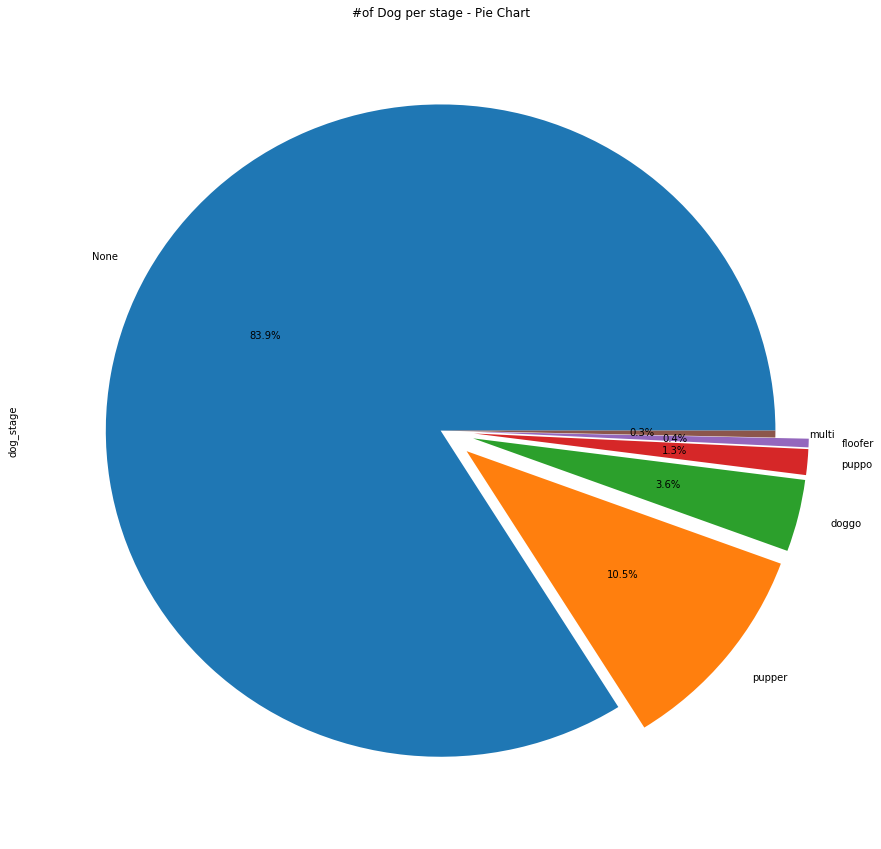

In [50]:
ls = df_csv_cleaned.dog_stage.value_counts()


ls.plot.pie(figsize=(15,15), fontsize=10, explode = (0,0.1,0.1,0.1,0.1,0), title='#of Dog per stage - Pie Chart', autopct='%1.1f%%')
plt.show()

#### Issue-2:
Drop retweets and replies from the dataset with all related columns.

In [51]:
# read replies to delete it
list_nnull = pd.notnull(df_csv_cleaned['in_reply_to_user_id'])
df_csv_cleaned[list_nnull].index

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [52]:
# drop all replies
df_csv_cleaned = df_csv_cleaned.drop(df_csv_cleaned[list_nnull].index)

In [53]:
# reset index
df_csv_cleaned = df_csv_cleaned.reset_index(drop=True)

In [54]:
# read retweets to delete it
list_nnull = pd.notnull(df_csv_cleaned['retweeted_status_id'])
df_csv_cleaned[list_nnull].index

Int64Index([  19,   31,   35,   65,   70,   71,   75,   88,   92,   94,
            ...
             892,  903,  909,  915,  976,  985, 1005, 1202, 2181, 2182],
           dtype='int64', length=181)

In [55]:
# drop all retweets
df_csv_cleaned = df_csv_cleaned.drop(df_csv_cleaned[list_nnull].index)

In [56]:
# reset index
df_csv_cleaned = df_csv_cleaned.reset_index(drop=True)

In [57]:
# drop all column related to retweets and replies
df_csv_cleaned = df_csv_cleaned.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [58]:
df_csv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 9 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null object
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null int64
rating_denominator    2096 non-null int64
name                  2096 non-null object
dog_stage             2096 non-null object
dtypes: int64(3), object(6)
memory usage: 147.5+ KB


#### Issue-3:
Rename 'name' to 'dog_name' and 'timestamp' to 'tweet_time'.

In [59]:
df_csv_cleaned.columns = ['tweet_id','tweet_time','source','text','expanded_urls','rating_numerator','rating_denominator','dog_name','dog_stage']

In [60]:
df_csv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 9 columns):
tweet_id              2096 non-null int64
tweet_time            2096 non-null object
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null int64
rating_denominator    2096 non-null int64
dog_name              2096 non-null object
dog_stage             2096 non-null object
dtypes: int64(3), object(6)
memory usage: 147.5+ KB


#### Issue-4:
source column contents will be rectified to represent the source without any link

In [61]:
df_csv_cleaned.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1963
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [62]:
 for i in range(len(df_csv_cleaned.index)):
    if df_csv_cleaned.loc[i, 'source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        df_csv_cleaned.loc[i, 'source'] = 'Twitter for iPhone'
    elif df_csv_cleaned.loc[i, 'source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        df_csv_cleaned.loc[i, 'source'] = 'Vine'
    elif df_csv_cleaned.loc[i, 'source'] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        df_csv_cleaned.loc[i, 'source'] = 'Twitter Web Client'
    elif df_csv_cleaned.loc[i, 'source'] == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        df_csv_cleaned.loc[i, 'source'] = 'TweetDeck'

In [63]:
df_csv_cleaned.source.value_counts()

Twitter for iPhone    1963
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

Text(0.5,1,'Barchart - #of tweets per source')

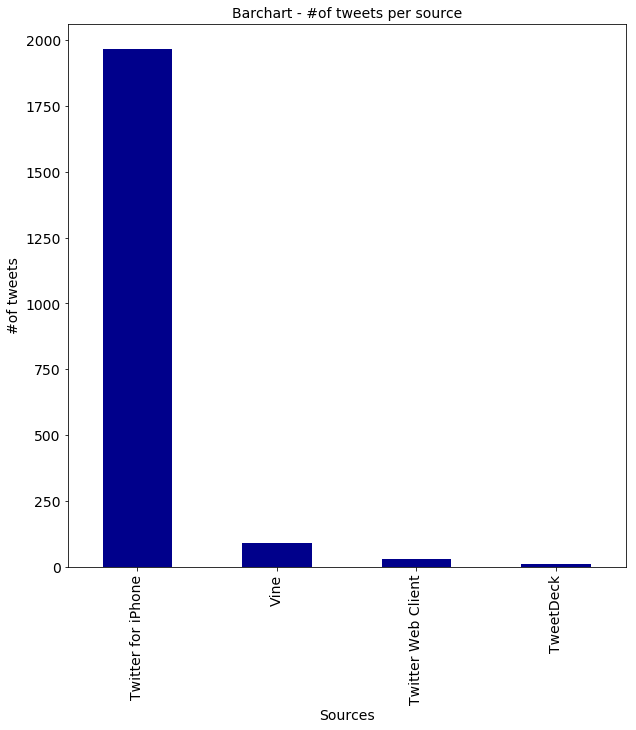

In [64]:
ls = df_csv_cleaned.source.value_counts()

plt.figure()
ax = ls.plot.bar( x='source', rot=90, color='darkblue', figsize=(10, 10),fontsize=14);
plt.xlabel('Sources', fontsize=14)
plt.ylabel('#of tweets', fontsize=14)
plt.title('Barchart - #of tweets per source',fontsize=14)

#### Issue-5:
tweets with rating_numerator more than 14 or less than 8 to be dropped

In [65]:
# for i in range(len(df_csv.index)):
#    if df_csv.loc[i, 'rating_numerator'] > 14:
#        df_csv = df_csv.drop(df_csv.loc[i])
#    elif df_csv.loc[i, 'rating_numerator'] < 8:
#        df_csv = df_csv.drop(df_csv.loc[i])
#for i in range(len(df_csv.index)):
#    if (df_csv.loc[i, 'rating_numerator']>14):
#        print(df_csv[i].index)
        #df_csv = df_csv.drop(df_csv[i].index)
df_csv_cleaned.drop(df_csv_cleaned[df_csv_cleaned['rating_numerator'] > 14].index, inplace=True)
df_csv_cleaned.drop(df_csv_cleaned[df_csv_cleaned['rating_numerator'] < 8].index, inplace=True)

In [66]:
df_csv_cleaned.rating_numerator.value_counts()

12    486
10    435
11    413
13    287
9     153
8      98
14     38
Name: rating_numerator, dtype: int64

#### Issue-6:
tweets with rating_denominator is not equal 10 to be dropped

In [67]:
df_csv_cleaned.drop(df_csv_cleaned[df_csv_cleaned['rating_denominator'] != 10].index, inplace=True)

In [68]:
# reset index
df_csv_cleaned = df_csv_cleaned.reset_index(drop=True)

In [69]:
df_csv_cleaned.rating_denominator.value_counts()

10    1909
Name: rating_denominator, dtype: int64

And since I cleaned the rating_denominator column and there is only one value, I'll drop the column and rename the rating_numerator to represent rating out of 10

In [70]:
# drop rating_denominator column
df_csv_cleaned = df_csv_cleaned.drop(['rating_denominator'], axis=1)

In [71]:
df_csv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 8 columns):
tweet_id            1909 non-null int64
tweet_time          1909 non-null object
source              1909 non-null object
text                1909 non-null object
expanded_urls       1906 non-null object
rating_numerator    1909 non-null int64
dog_name            1909 non-null object
dog_stage           1909 non-null object
dtypes: int64(2), object(6)
memory usage: 119.4+ KB


In [72]:
df_csv_cleaned.columns = ['tweet_id','tweet_time','source','text','expanded_urls','dog_rating_(X/10)','dog_name','dog_stage']

In [73]:
df_csv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 8 columns):
tweet_id             1909 non-null int64
tweet_time           1909 non-null object
source               1909 non-null object
text                 1909 non-null object
expanded_urls        1906 non-null object
dog_rating_(X/10)    1909 non-null int64
dog_name             1909 non-null object
dog_stage            1909 non-null object
dtypes: int64(2), object(6)
memory usage: 119.4+ KB


#### Issue-7:
Dogs with dog_name 'a', 'an' and 'the' will be renamed to 'None' since the exist name doesn't represent their real names.

In [74]:
 for i in range(len(df_csv_cleaned.index)):
    if df_csv_cleaned.loc[i, 'dog_name'] == 'a':
        df_csv_cleaned.loc[i, 'dog_name'] = 'None'
    elif df_csv_cleaned.loc[i, 'dog_name'] == 'an':
        df_csv_cleaned.loc[i, 'dog_name'] = 'None'
    elif df_csv_cleaned.loc[i, 'dog_name'] == 'the':
        df_csv_cleaned.loc[i, 'dog_name'] = 'None'

In [75]:
df_csv_cleaned.dog_name.value_counts()

None        575
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Daisy         7
Jax           6
Oscar         6
Bailey        6
Stanley       6
Bo            6
Koda          6
Toby          6
Bella         5
Louis         5
Scout         5
Milo          5
Bentley       5
Buddy         5
Leo           5
Brody         4
Jeffrey       4
Chester       4
Maggie        4
Archie        4
           ... 
Canela        1
Dante         1
Willow        1
Jessifer      1
Skye          1
Steven        1
Dawn          1
Buddah        1
Ed            1
Jareld        1
Ken           1
Petrick       1
Stubert       1
Bode          1
such          1
mad           1
Kloey         1
Tove          1
Kenzie        1
Betty         1
Kobe          1
Cal           1
Miguel        1
Flurpson      1
Benny         1
Rodman        1
Huxley        1
Linda         1
Lucky         1
Edmund        1
Name: dog_name, Length: 

#### Issue-8:
Tweets without images to be dropped

In [76]:
# find tweets index
df_csv_cleaned[df_csv_cleaned.expanded_urls.isnull()].index

Int64Index([292, 531, 1172], dtype='int64')

In [77]:
# drop tweets
df_csv_cleaned.drop(df_csv_cleaned[df_csv['expanded_urls'].isnull()].index, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [78]:
# reset index
df_csv_cleaned = df_csv_cleaned.reset_index(drop=True)

In [79]:
df_csv_cleaned[df_csv_cleaned.expanded_urls.isnull()].index

Int64Index([276, 506, 1137], dtype='int64')

#### Issue-9:
Convert tweet_time column type to datatime

In [80]:
df_csv_cleaned['tweet_time'] = pd.to_datetime(df_csv_cleaned['tweet_time'])
df_csv_cleaned.dtypes

tweet_id                      int64
tweet_time           datetime64[ns]
source                       object
text                         object
expanded_urls                object
dog_rating_(X/10)             int64
dog_name                     object
dog_stage                    object
dtype: object

#### Issue-10:
Each image has three predictions

In [81]:
df_tsv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [82]:
# drop second and third prediction columns with all related columns
df_tsv_cleaned = df_tsv_cleaned.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

In [83]:
df_tsv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


#### Issue-11:
Rename column titles

In [84]:
df_tsv_cleaned.columns = ['tweet_id','jpg_url','img_num','prediction','prediction_confidence','prediction_is_a_dog']

In [85]:
df_tsv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id                 2075 non-null int64
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
prediction               2075 non-null object
prediction_confidence    2075 non-null float64
prediction_is_a_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


#### Issue-12:
Correct uncorrect prediction

In [86]:
df_tsv_cleaned.loc[106]

tweet_id                                              667866724293877760
jpg_url                  https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg
img_num                                                                1
prediction                                                 jigsaw_puzzle
prediction_confidence                                                  1
prediction_is_a_dog                                                False
Name: 106, dtype: object

In [87]:
# drop uncorrect prediction
df_tsv_cleaned.drop(df_tsv_cleaned[df_tsv_cleaned['tweet_id'] == 667866724293877760].index, inplace=True)


In [88]:
# reset index
df_tsv_cleaned = df_tsv_cleaned.reset_index(drop=True)

save cleaned datasets into a master dataset

In [89]:
twitter_archive_master = pd.merge(df_csv_cleaned, df_tsv_cleaned, how='inner', on = 'tweet_id')

In [90]:
twitter_archive_master.head(5)

,tweet_id,tweet_time,source,text,expanded_urls,dog_rating_(X/10),dog_name,dog_stage,jpg_url,img_num,prediction,prediction_confidence,prediction_is_a_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True


### Section-4-2 - Check Prediction Algorithm Accurecy

I'll check neural network's algorithm after some cleaning and merge two tables 

In [91]:
lst = []
for i in range(len(twitter_archive_master)):
    if twitter_archive_master.loc[i, 'prediction_is_a_dog'] == False:
        if twitter_archive_master.loc[i, 'dog_stage'] != 'None' :
            lst.append(twitter_archive_master.loc[i, 'tweet_id'])


lst[:5]

[836753516572119041,
 836380477523124226,
 834574053763584002,
 819924195358416896,
 819006400881917954]

I'll disply a tweet from previous query to check which information is wrong, the prediction or the dog_stage. I'll check tweet_id 836753516572119041

In [92]:
twitter_archive_master.loc[twitter_archive_master['tweet_id'] == 836753516572119041]

,tweet_id,tweet_time,source,text,expanded_urls,dog_rating_(X/10),dog_name,dog_stage,jpg_url,img_num,prediction,prediction_confidence,prediction_is_a_dog
209,836753516572119041,2017-03-01 01:42:39,Twitter for iPhone,This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12,Meera,doggo,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1,mortarboard,0.936882,False


<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a  doggo anymore. 12/10 <a href="https://t.co/GZmNEdyoJY">pic.twitter.com/GZmNEdyoJY</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/836753516572119041?ref_src=twsrc%5Etfw">March 1, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

From previous query, There are tweets where it has a dog_stage even though the prediction concluded it's not a dog.

In [144]:
test = pd.DataFrame(twitter_archive_master[['dog_stage','prediction_is_a_dog']])

In [145]:
test.head()

,dog_stage,prediction_is_a_dog
0,None,False
1,None,True
2,None,True
3,None,False
4,None,True


In [148]:
tst = test.groupby(['dog_stage','prediction_is_a_dog'])['prediction_is_a_dog'].count()

In [150]:
tst

dog_stage  prediction_is_a_dog
None       False                   319
           True                   1129
doggo      False                    15
           True                     46
floofer    True                      8
multi      True                      4
pupper     False                    47
           True                    142
puppo      False                     3
           True                     19
Name: prediction_is_a_dog, dtype: int64

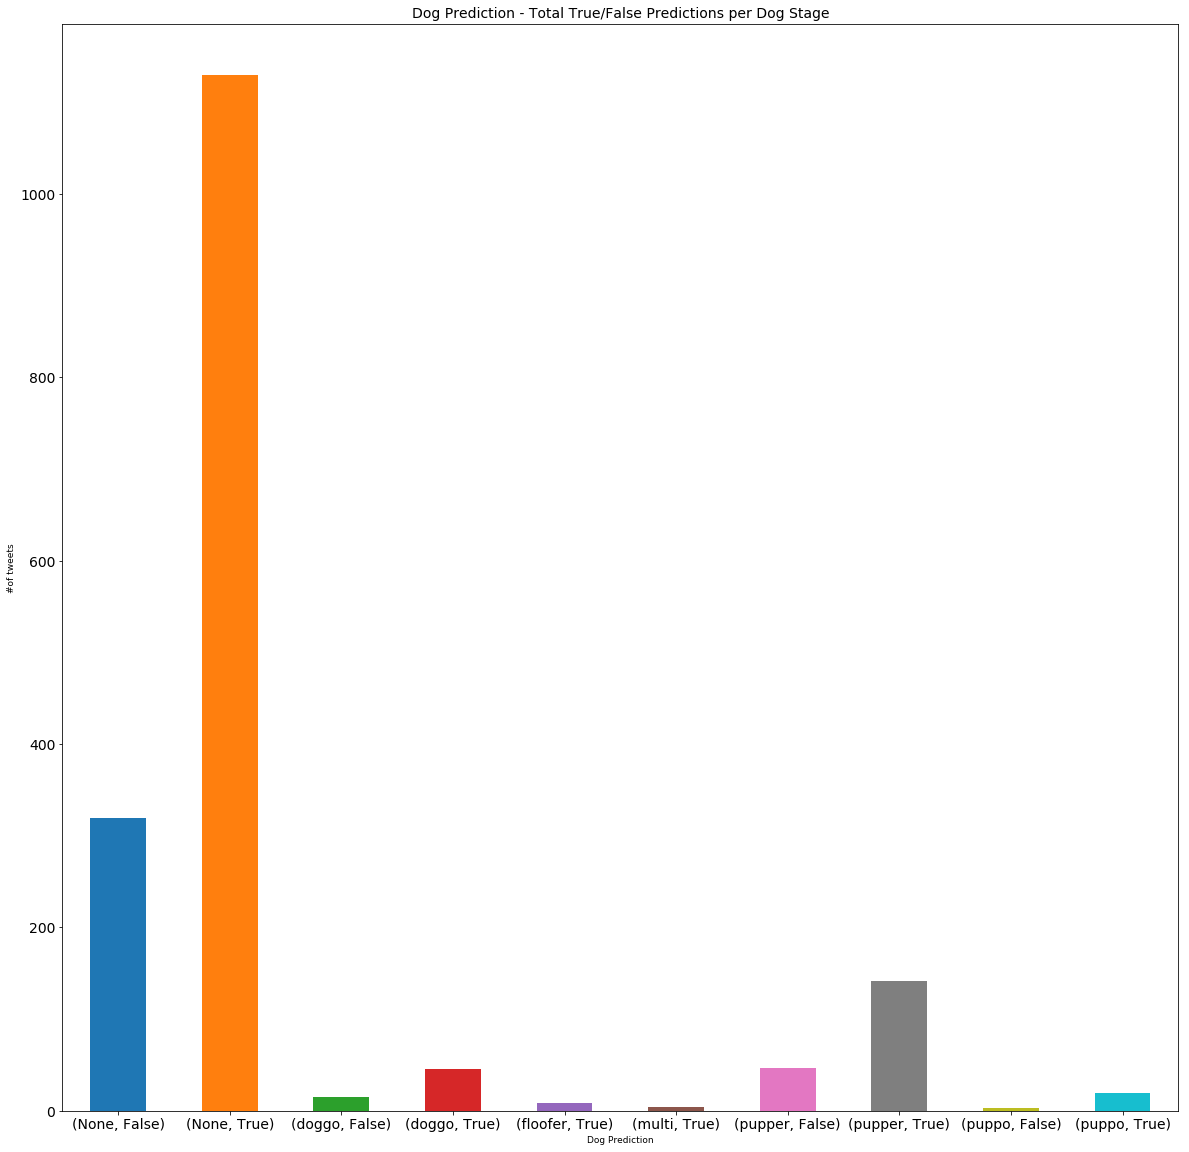

In [209]:
plt.figure()
tst.plot(x=['dog_stage','prediction_is_a_dog','dog_stage'] , kind='bar',figsize=(20,20), rot = 0, fontsize=14)
plt.xlabel('Dog Prediction', fontsize=9)
plt.ylabel('#of tweets', fontsize=9)
plt.title('Dog Prediction - Total True/False Predictions per Dog Stage',fontsize=14)
plt.show()


# Section-5 - Storing and Acting

In [ ]:
# store Master dataset into csv file
exported_df = twitter_archive_master.to_csv(r'twitter_archive_master.csv', index = None, header=True)
print(exported_df)

# Section-6 - Insights and Conclusion

- The data sets are not ready, yet, and need to be cleaned before the researcher can depends on it.
- The tweet prediction with 100% confidence was wrong. Thus, the training algorithm for this neural network needs to be modified to avoid any similar issue in the future.
- The algorithm predicts that some images doesn't have a dog in it although it's a dog's image.
- The source of most of the tweets was from IPhone.
- Most image doesn't have names.
- The algorithm can't predict a dog_stage for most of the images.